In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [26]:
post_list = np.load("../Data/adidas_py.npy",allow_pickle=True)

In [27]:
post_list = post_list.tolist()

In [28]:
res=[]
for post in post_list:
    if len(post['comments_full']) > 0:
      print(post['comments_full'])
      cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full'] ])
      res.append(cmt)
print(len(res))

[{'comment_id': '348656950982117', 'comment_url': 'https://facebook.com/348656950982117', 'commenter_id': '100004107352781', 'commenter_url': 'https://facebook.com/profile.php?id=100004107352781&eav=AfYvLCF8SKWrJx0Uy6ko_McYs5pAYbyvvrKAWpa8qnWtBXCOo0cmSFbHWvxQOkFp3uU&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Đ.Thanh Nguyễn', 'commenter_meta': None, 'comment_text': 'Xin địa chỉ shop ở tây ninh ạ…', 'comment_time': None, 'comment_image': 'https://www.adidas.com.vn/?fbclid=IwAR3KUnyuMJw_cw8S46QEmnDcgGhV0G1P4rbitcB7oK6iYx7oF0gC2gYbHR8', 'comment_reactors': [], 'comment_reactions': None, 'comment_reaction_count': None, 'replies': [{'comment_id': '1150807252563288', 'comment_url': 'https://facebook.com/1150807252563288', 'commenter_id': '100068085633373', 'commenter_url': 'https://facebook.com/adidasVN?eav=AfYCZKYvExla3-I6ms4C8Fn2REZ_JjETNMNCTf4l8MDLY1LshrPOZTDZqRCU7JIogWo&fref=nf&rc=p&refid=52&__tn__=%7ERR&paipv=0', 'commenter_name': 'adidas', 'commenter_meta': 'Tác giả', '

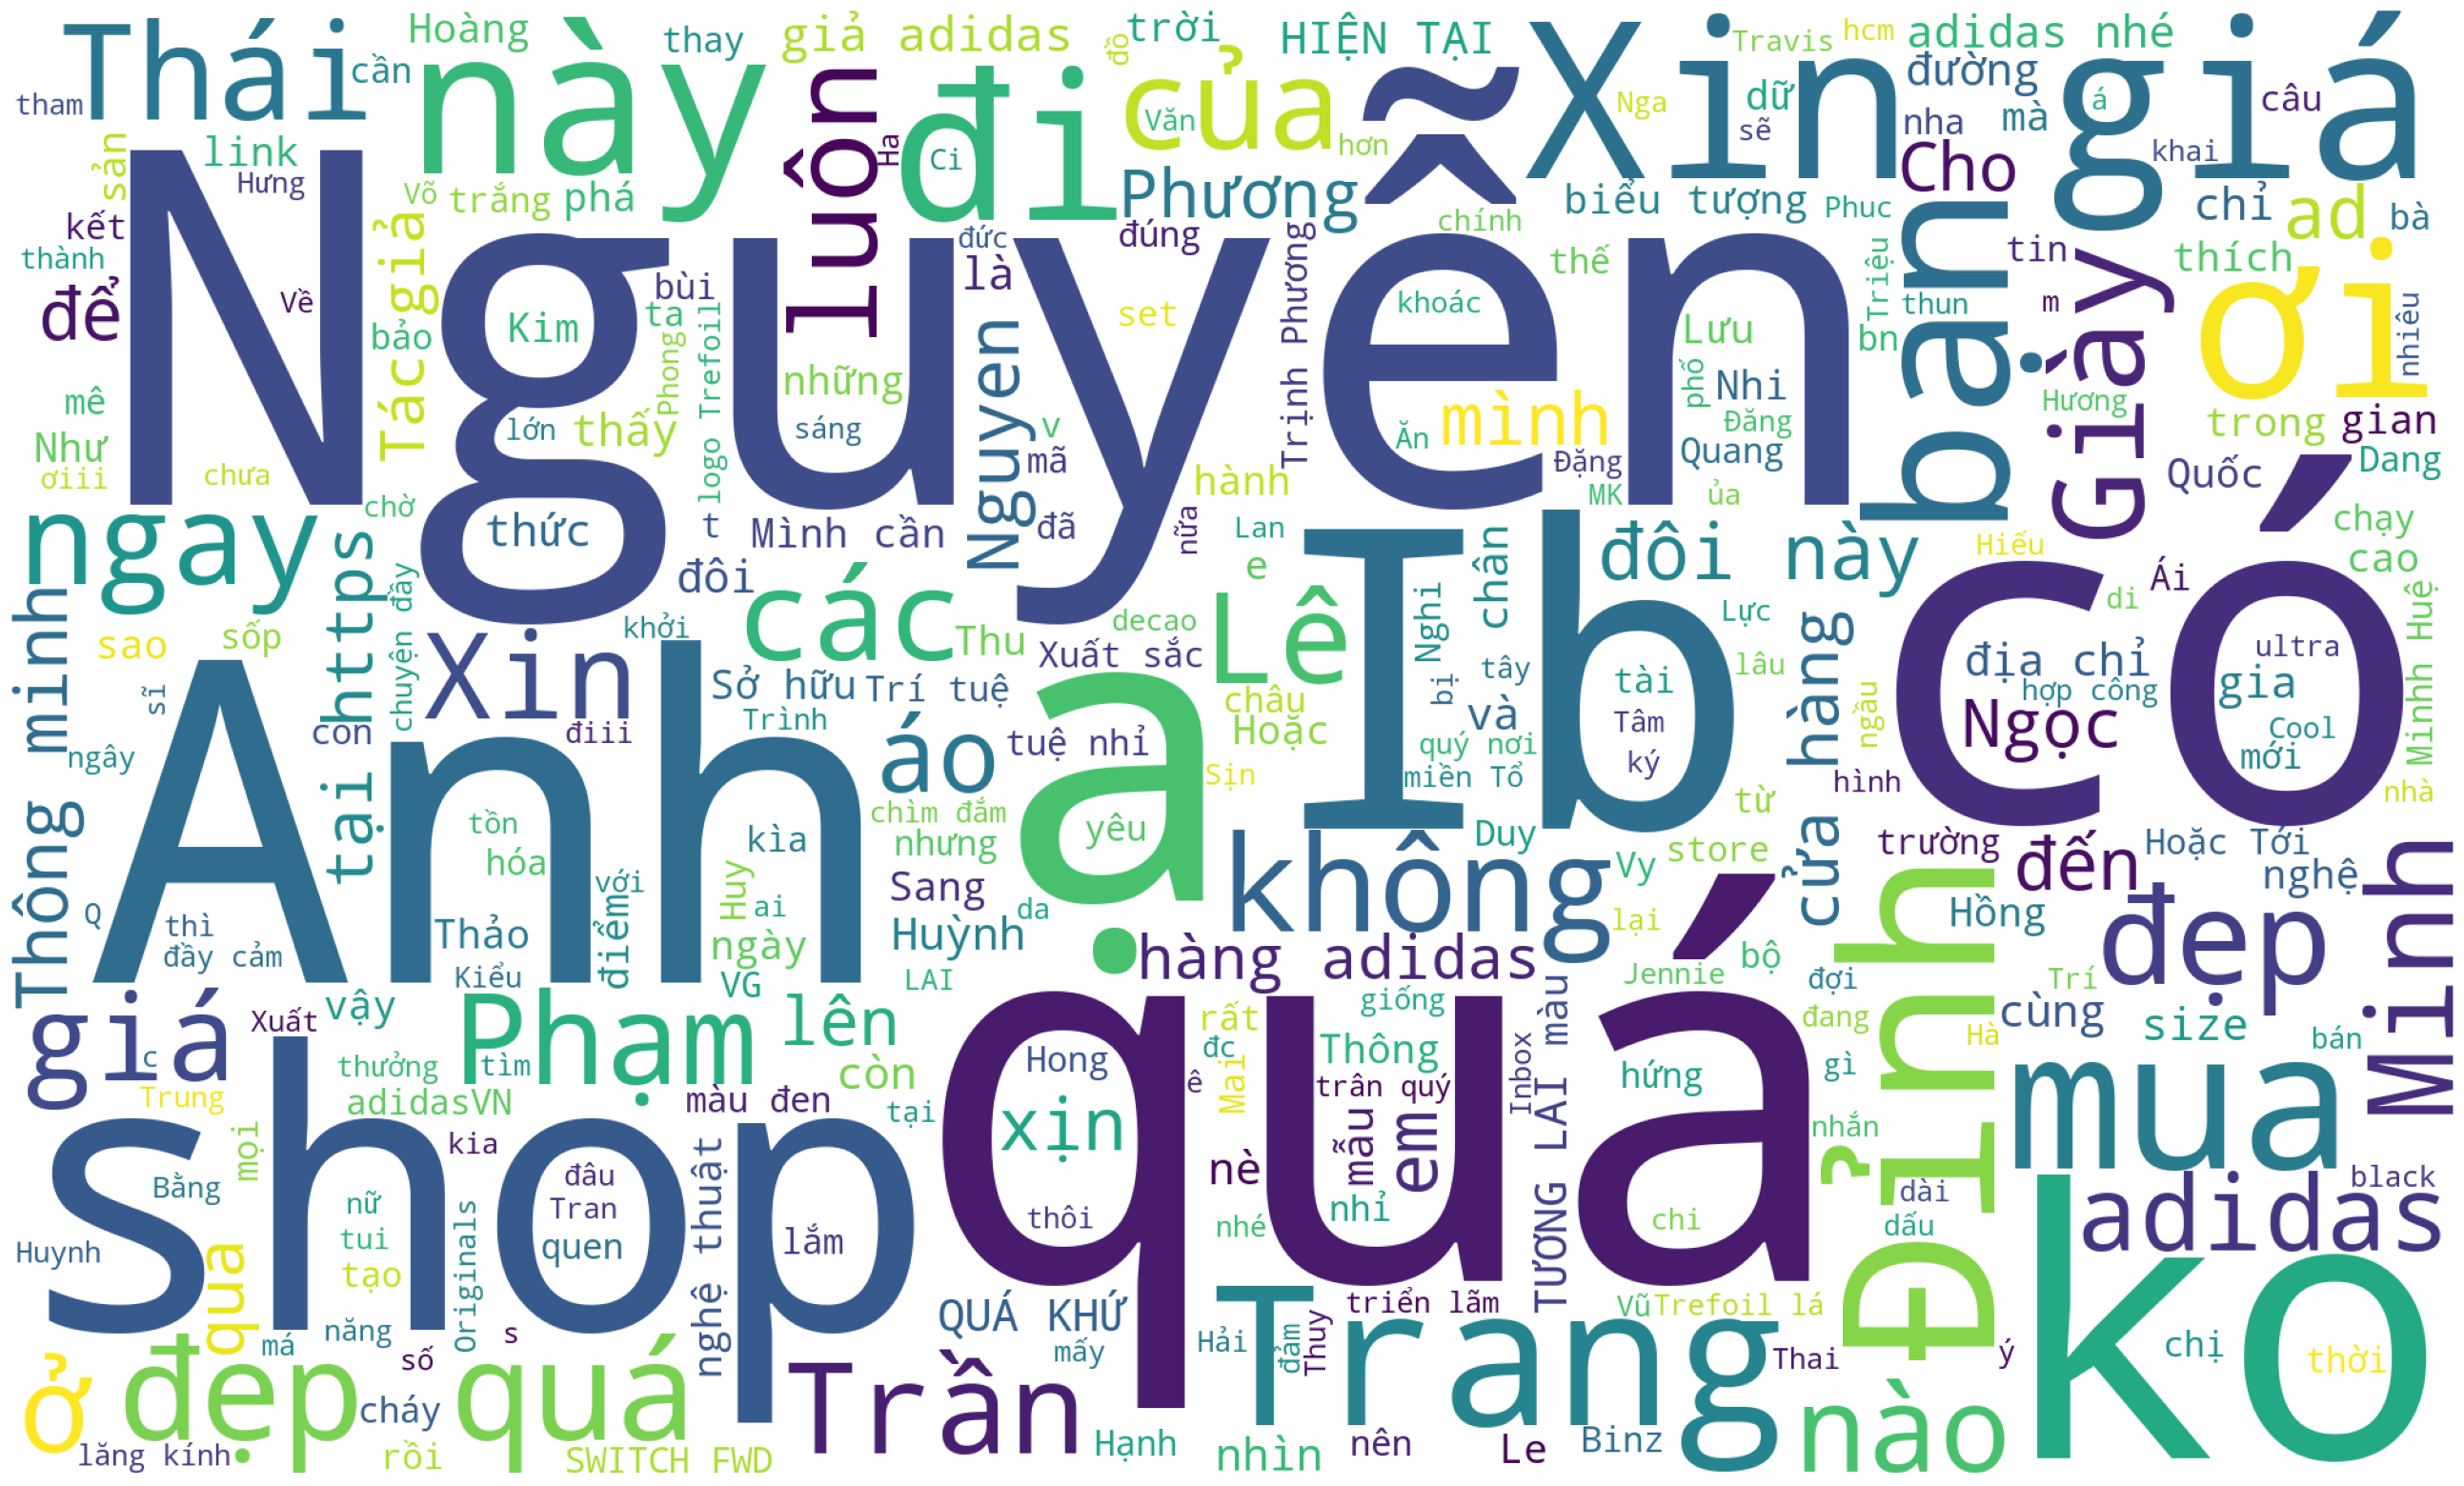

In [29]:
text = ''
for i in res:
    i = str(i)
    text=text+i+'\n'
text
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

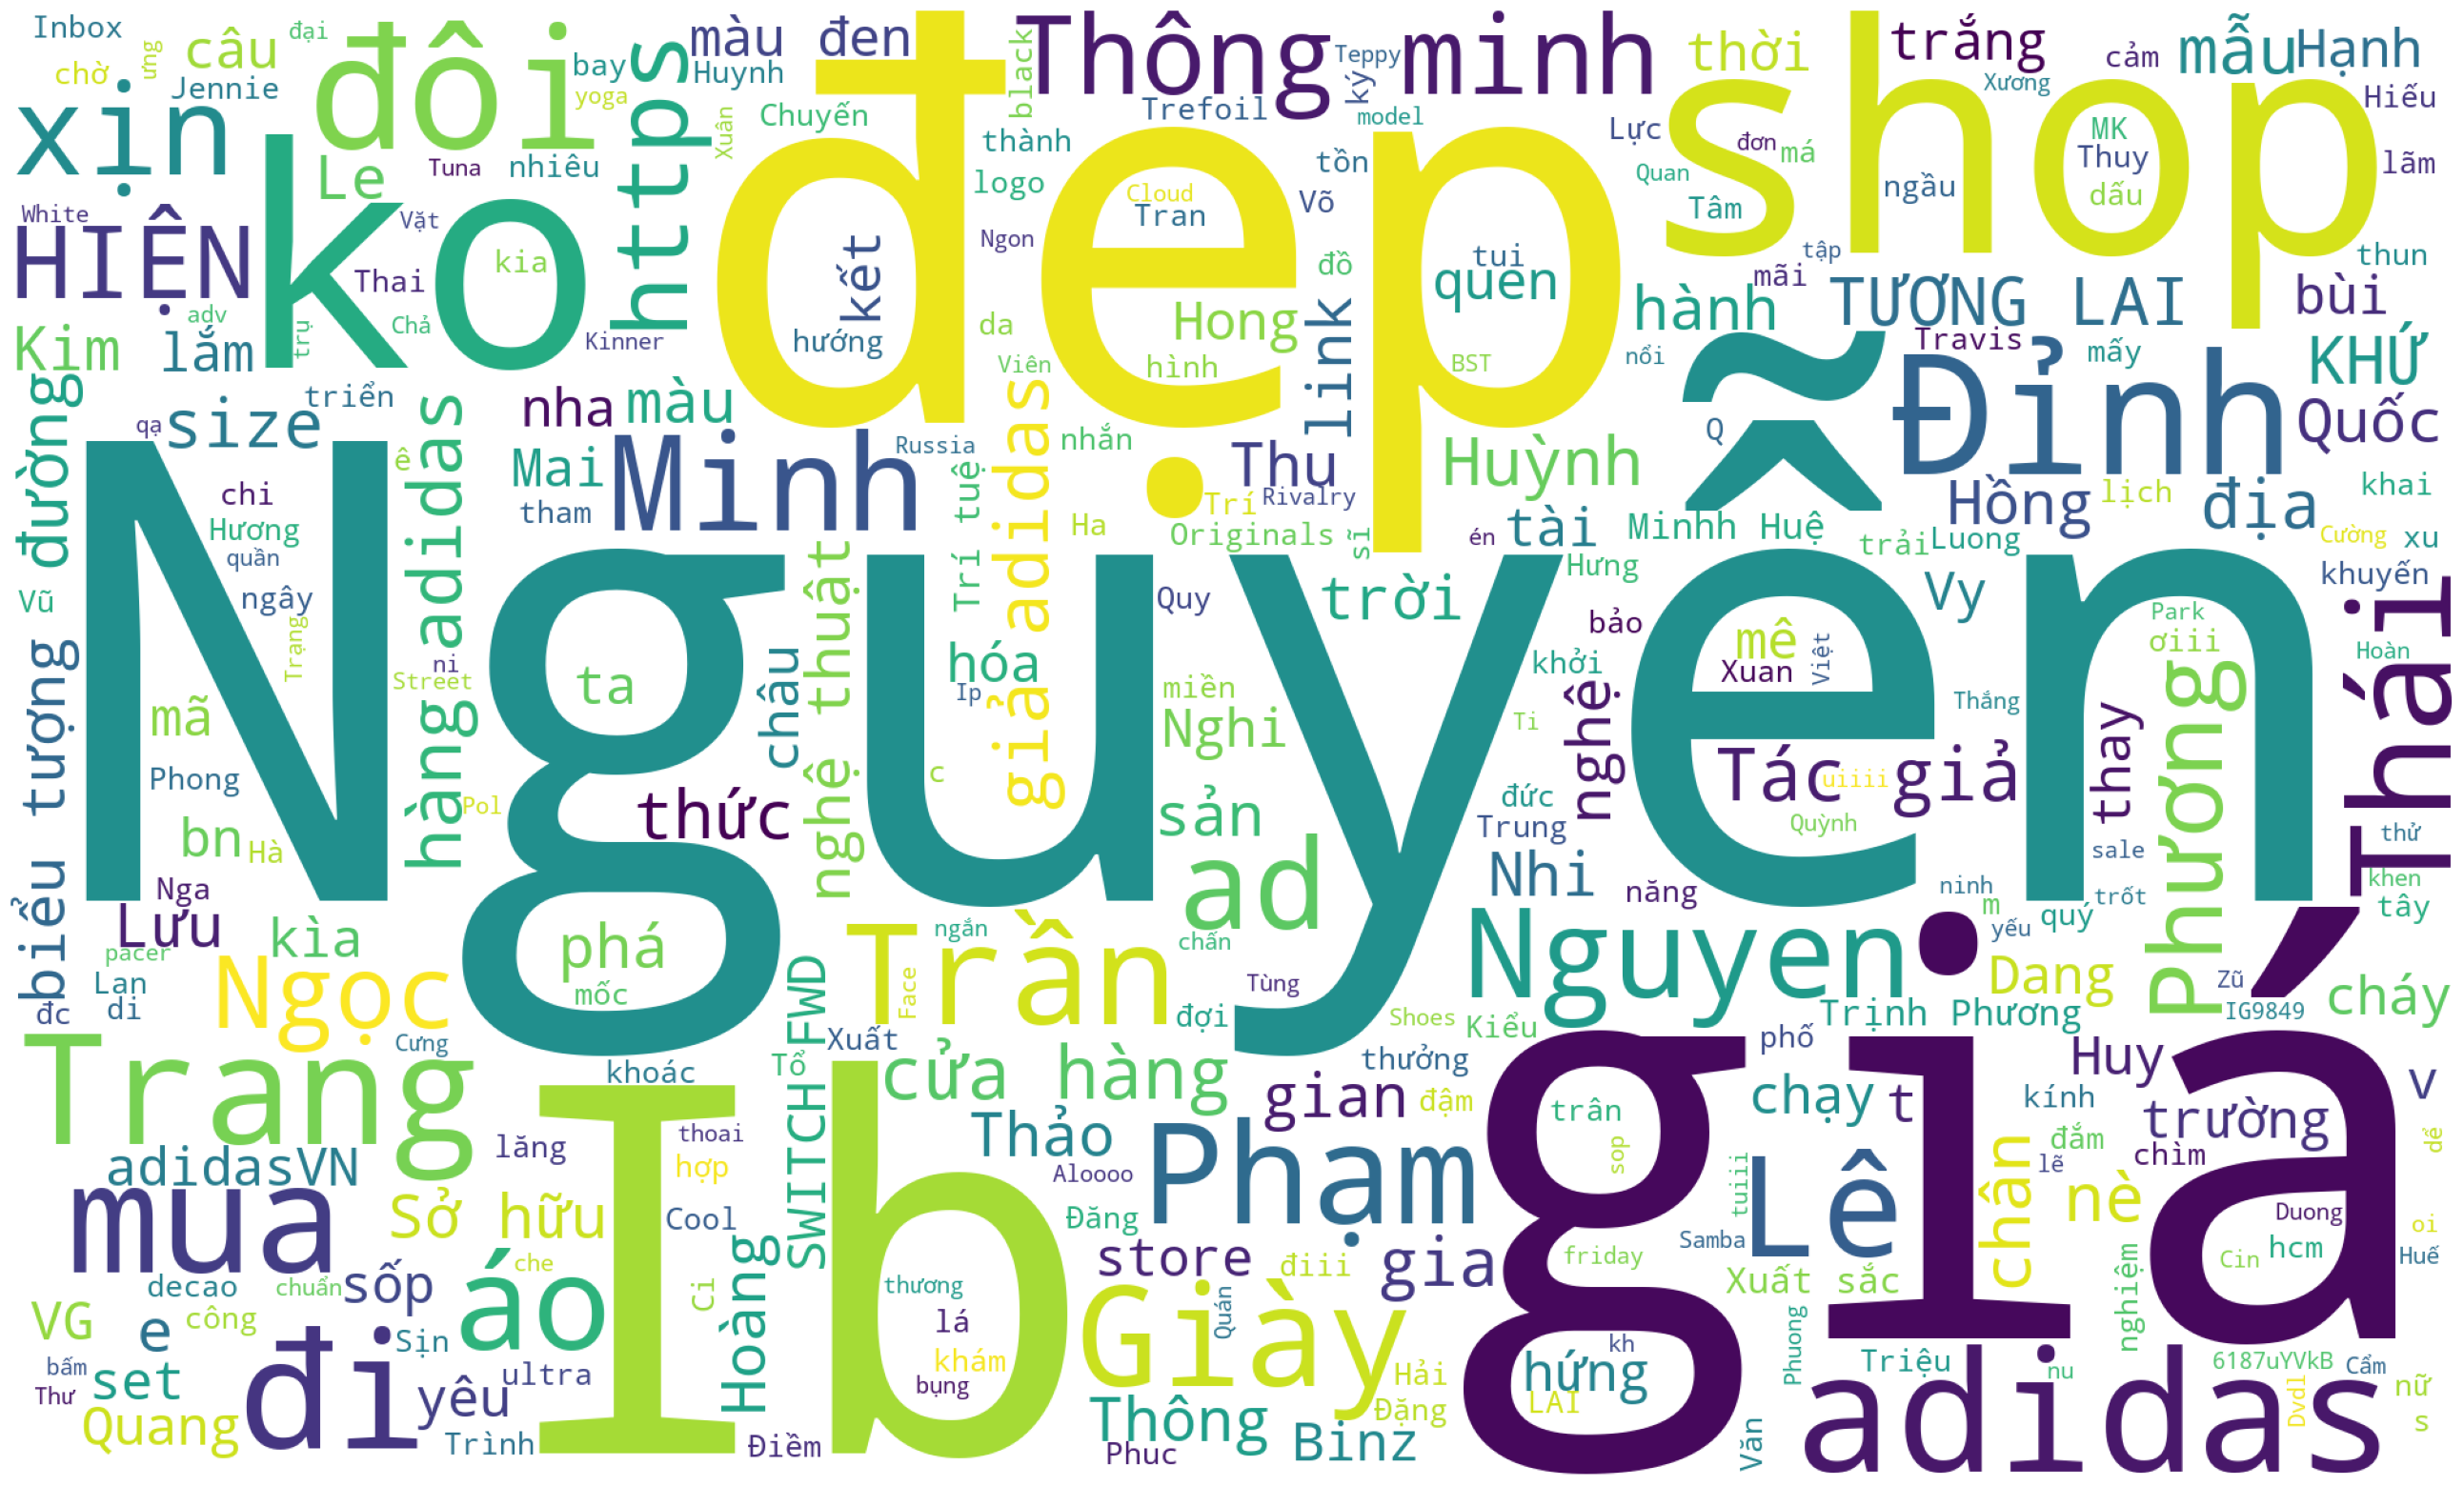

In [30]:
import requests
url = 'https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt'
response = requests.get(url)
vietnamese_stopwords = set(response.text.splitlines())

# Thêm vào stopword mặc định
vietnamese_stopwords.update(STOPWORDS)
for word in vietnamese_stopwords:
    text = text.replace(' ' + word + ' ', ' ')
wordcloud = WordCloud(stopwords=vietnamese_stopwords, background_color='white', max_words=300, width=2000, height=1200).generate(text)

# Hiển thị WordCloud
plt.figure(figsize=(40,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Crawl profile của những người comment


In [ ]:
res = []
for post in post_list:
    if len(post['comments_full']) >0:
        for comment in post['comments_full']:
            res.append(comment['commenter_id'])
            if len(comment['replies']) > 0:
                for each_reply in comment['replies']:
                    res.append(each_reply['commenter_id'])
print(res)

In [ ]:
#loại bỏ commenter_id trùng lặp
set_res = set(res)
res = list(set_res)

In [ ]:
from facebook_scraper import get_profile

In [ ]:
# crawl tiếp tục bắt đầu từ id cuối cùng của lần crawl trước
continue_profile_list = []
id_continue = '100010340981665'
check = False
for i in res:
    if check:
        continue_profile_list.append(i)
    if i == id_continue:
        check = True


In [ ]:
cookie_path = '../Data/www.facebook.com_cookies.txt'
profile_list = []
for id in continue_profile_list:
    profile = get_profile(id, cookies = cookie_path)
    print(profile)
    profile_list.append(profile)

In [ ]:
profile_list_to_df = pd.DataFrame(columns=profile_list[0].keys(), index=range(len(profile_list)), data=profile_list)
FOLDER_PATH = '../Data/'
path1=FOLDER_PATH + 'comment7' + ".csv"
path2=FOLDER_PATH + 'comment7' + ".xlsx"
profile_list_to_df.to_csv(path1, index=False)
profile_list_to_df.to_excel(path2, index=False)